# <b><font color = 'orange'>Algerian Forest Fires Dataset</font>
## <b><font color = 'blue'>Data Set Information:</font>

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

## <b><font color = 'blue'>Attribute Information:</font>

- <b>1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
- <b>2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- <b>3. RH : Relative Humidity in %: 21 to 90
- <b>4. Ws :Wind speed in km/h: 6 to 29
- <b>5. Rain: total day in mm: 0 to 16.8 FWI Components
- <b>6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- <b>7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- <b>8. Drought Code (DC) index from the FWI system: 7 to 220.4
- <b>9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- <b>10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
- <b>11. Fire Weather Index (FWI) Index: 0 to 31.1
- <b>12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This dataset is already clean
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# df.loc[:122,"Region"] = 1 (the Bejaia region) ## To create a new column and assign 1 range from 0 to 122(last one is excluded)
# df.loc[122:,"Region"] = 0 (the Sidi Bel-abbes region)  ## To create a new column and assign 0 range from 122 to last(First one is included)
# dataset = df

In [5]:
print(df.columns)

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [7]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# df[df.isnull().any(axis=1)]

In [10]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [11]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
df.Classes = np.where(df.Classes.str.contains('not fire'),0,1)

In [13]:
df.Classes.value_counts() # 1 >> fire eand 0 >> not fire

Classes
1    137
0    106
Name: count, dtype: int64

In [14]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int64
dtype: object

In [15]:
percentage = df.Classes.value_counts(normalize=True) * 100

In [16]:
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

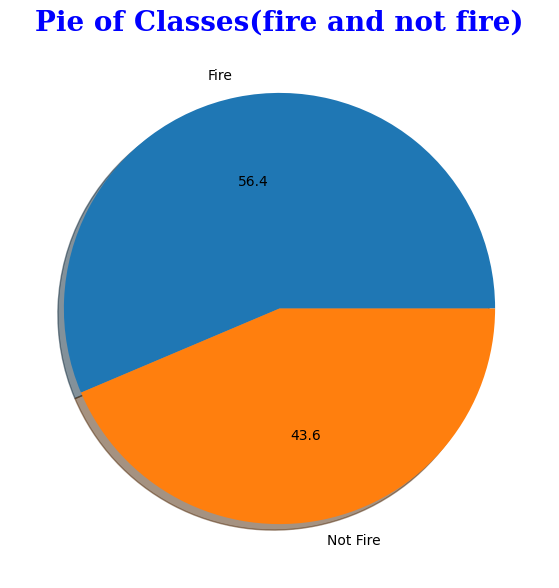

In [17]:
plt.figure(figsize=(12,7))
class_label = ['Fire','Not Fire']
plt.pie(percentage,labels=class_label,autopct='%1.1f',shadow=True)
plt.title('Pie of Classes(fire and not fire)',fontdict={'size':20,'color':'blue','family':'serif','weight':'bold'})
plt.xticks(color = 'red')
plt.show()

In [18]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [19]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [20]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [21]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## <b>  Feature Selection

In [24]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(X_train,0.85)

In [26]:
corr_features

{'BUI', 'DC'}

In [27]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [28]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
154,34,56,17,0.1,84.7,9.7,4.7,1,1
164,39,45,13,0.6,85.2,11.3,4.2,1,1
110,29,57,14,0.0,89.3,12.5,7.8,1,0
224,31,72,14,0.0,84.2,8.3,3.8,1,1


## <b>Feature Scaling or Standardization

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_test_scaled = scaler.transform(X_test)

## <b> Box plots to understand effect of Standard Scaler

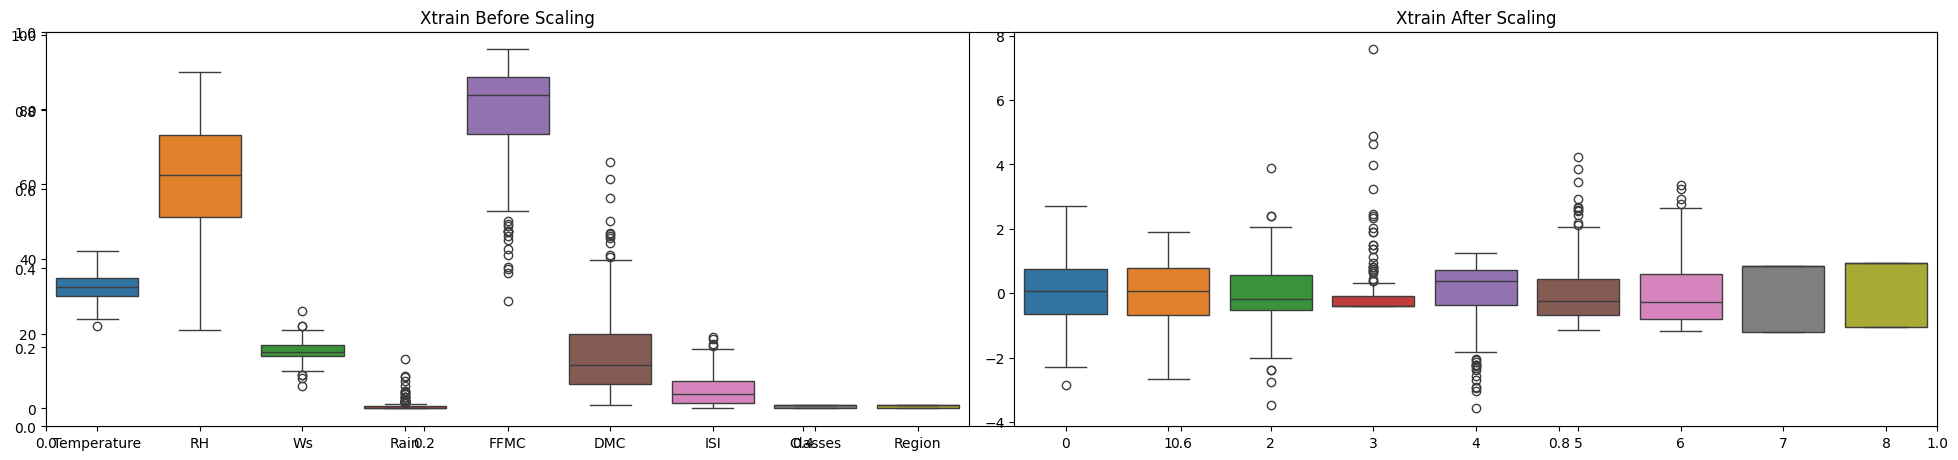

In [33]:
plt.subplots(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Xtrain Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('Xtrain After Scaling') 
plt.tight_layout()
plt.show()

<Axes: >

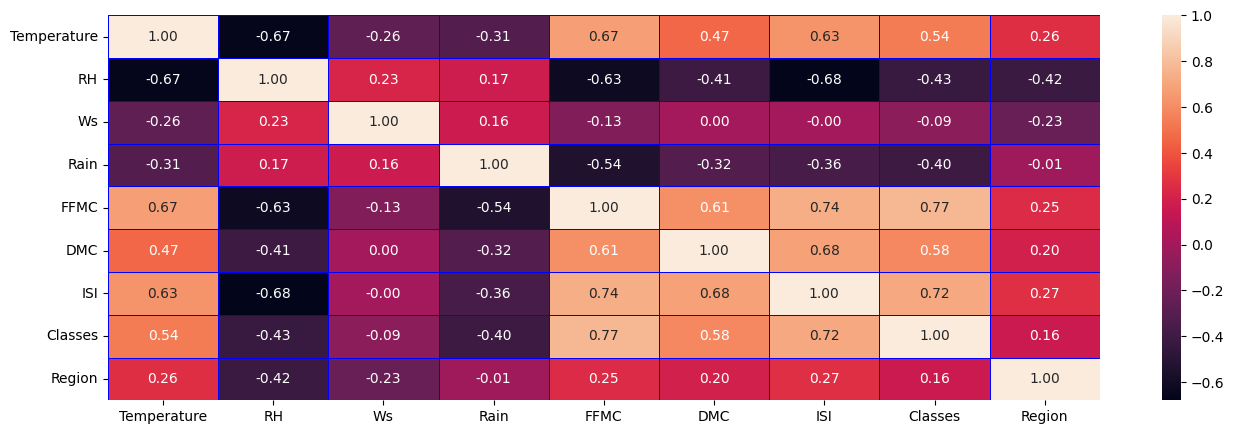

In [34]:
plt.figure(figsize=(16,5))
sns.heatmap(X_train.corr(),annot=True,linecolor='b',linewidths=0.5,fmt=".2f")

In [35]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

# <b>Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
MAE = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',MAE)
print('R2 Score',score)

mean absolute error 0.7445186409353701
R2 Score 0.9772401390831915


# <b> Lasso Rigression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
MAE = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',MAE)
print('R2 Score',score)

mean absolute error 1.2838358768011289
R2 Score 0.9432590062559808


# <b> Ridge Rigression

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
MAE = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',MAE)
print('R2 Score',score)

mean absolute error 0.7470866072036623
R2 Score 0.9769605525389531


# <b> Elastic Net

In [41]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error , r2_score
EN = ElasticNet()
EN.fit(X_train_scaled,y_train)
y_pred = EN.predict(X_test_scaled)
MAE = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mean absolute error',MAE)
print('R2 Score',score)

mean absolute error 1.75540505156377
R2 Score 0.8915472291323514


In [42]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))